In [15]:
%reload_kedro
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

[12/27/23 04:21:17] INFO     Resolved project path as:                                              ]8;id=359303;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=413031;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/joelmashana/IRP/joel-mashana-dissertation-project.                              
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/27/23 04:21:17] INFO     Kedro project Joel Mashana Dissertation Project                        ]8;id=408267;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=684438;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=542196;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=73473;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=775026;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=23926;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/ipython/__init__.py#115\115]8;;\

In [16]:
data = catalog.load("buyer_payment_practices_filtered_encoded_final")
column_to_cluster = catalog.load("params:column_for_clustering")

[12/27/23 04:21:18] INFO     Loading data from 'buyer_payment_practices_filtered_encoded_final' ]8;id=87326;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=863088;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (CSVDataSet)...                                                                       

                    INFO     Loading data from 'params:column_for_clustering'                   ]8;id=686452;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=704958;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/kedro/io/data_catalog.py#492\492]8;;\
                             (MemoryDataset)...                                                                    

In [20]:
def find_optimal_clusters(data, column_to_cluster):
    feature = data[[column_to_cluster]]
    model = KMeans(random_state=0)
    # Use 'distortion' which represents WCSS to find the elbow point
    visualiser = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
    visualiser.fit(feature)
    visualiser.show()  # This will display the elbow plot with WCSS

    optimal_clusters = visualiser.elbow_value_

    print(f"Optimal number of clusters based on WCSS: {optimal_clusters}")

    return optimal_clusters


In [21]:
def perform_kmeans_clustering(data, column_to_cluster):
    optimal_number_of_clusters = find_optimal_clusters(data,  column_to_cluster)
    kmeans = KMeans(n_clusters=optimal_number_of_clusters, random_state=0)
    data['Clusters'] = kmeans.fit_predict(data[[column_to_cluster]])

    data['Risk Level'] = kmeans.labels_ + 1 # Assign risk levels, account for 0 index
    data = data.drop(['Clusters', '% Invoices not paid within agreed terms'], axis=1)

    assert 'Risk Level' in data.columns, "Risk Level column does not exist."
    assert 'Clusters' not in data.columns, "Clusters column should not exist after dropping it."
    assert '% Invoices not paid within agreed terms' not in data.columns, "Error: '% Invoices not paid within agreed terms' column still exists in the dataset."

    assert data['Risk Level'].nunique() == optimal_number_of_clusters, (
        "The number of unique values in the Risk Level column is not equal to the optimal number of clusters."
    )
    return data

[12/27/23 05:00:12] WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=203952;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=21561;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

[12/27/23 05:00:13] WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=246758;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=313702;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=942279;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=257440;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=811832;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=470328;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=636950;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=261607;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=119052;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=349701;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=880442;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=331039;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=578597;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=758884;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=183589;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=8873;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=656462;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=525517;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=772348;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=119051;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=472645;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88022;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=67028;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=875215;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=320913;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=718025;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=859551;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=647577;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=175439;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=831006;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=807127;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=807092;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=219894;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=689055;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=413821;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=681578;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=204223;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=573694;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=510974;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=120045;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=520095;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=586751;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=405817;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=827715;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=672327;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=759750;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=880370;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=121883;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=879801;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=622007;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=853929;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=769639;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=436541;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=282042;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=591890;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=483740;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=386399;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=218961;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=700253;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=299481;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=623774;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=579922;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=364125;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=182023;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=652227;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=532384;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=822935;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=829383;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=451885;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=863872;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=657492;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=765941;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=902038;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=420085;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=984542;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=378448;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=202170;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=219774;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=69899;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=258443;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=354061;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=585356;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=690200;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=505558;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=436362;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=855607;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=841465;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=202471;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=356121;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=952203;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=996048;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=625012;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=227634;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=582750;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=690730;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=711092;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=320629;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=633084;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=463946;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=809749;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=56209;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=683475;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=73855;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=338245;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=238477;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=997070;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=792622;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=143028;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=35031;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=667923;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=588395;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=508556;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=683750;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=852862;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=824048;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=339489;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=588077;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=327210;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=956375;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=929783;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=720358;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=648092;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=199803;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=403772;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=920175;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=88407;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=67464;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=617044;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=296873;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=517901;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=316392;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=695496;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=127855;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=587734;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=466998;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=59121;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=927633;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=284161;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=655400;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=792772;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=305790;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=686414;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=957097;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=923646;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=41815;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=448120;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=55594;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=644433;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=984510;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=519073;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=253708;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=969532;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=992233;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=758503;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=256695;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=82785;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=297020;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=602833;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

                    WARNING  findfont: Generic family 'sans-serif' not found because none of   ]8;id=598032;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=4338;file:///home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/python3.8/site-packages/matplotlib/font_manager.py#1333\1333]8;;\
                             the following families were found: Arial, Liberation Sans,                            
                             Bitstream Vera Sans, sans-serif                                                       

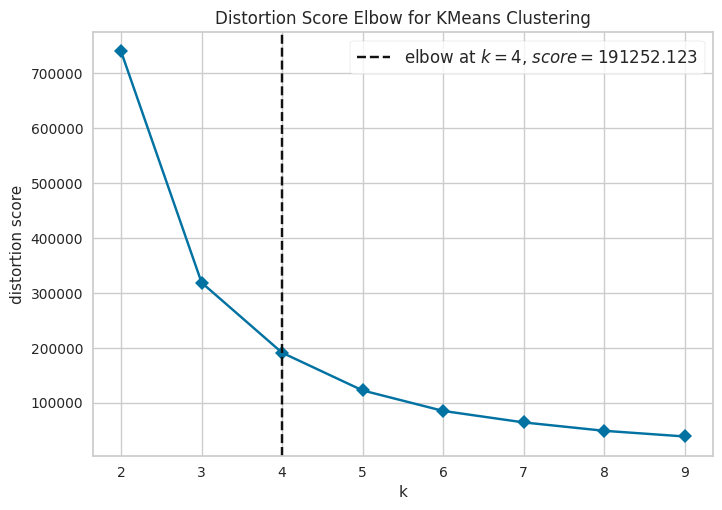

Optimal number of clusters based on WCSS: 4


                    WARNING  /home/joelmashana/IRP/joel-mashana-dissertation-project/.venv/lib/pyth ]8;id=94706;file:///usr/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=145619;file:///usr/lib/python3.8/warnings.py#109\109]8;;\
                             on3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                               super()._check_params_vs_input(X, default_n_init=10)                                
                                                                                                                   

,Period,Payments made in the reporting period,Average time to pay,% Invoices paid within 30 days,% Invoices paid between 31 and 60 days,% Invoices paid later than 60 days,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Suppliers notified of changes,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Policy covers charges for remaining on supplier list,Charges have been made for remaining on supplier list,Risk Level
0,2017 JAN - 2017 DEC,0.0,69.0,12.0,32.0,56.0,30.0,90.0,90.0,0,0.0,0,0,1,0,0,2
1,2017 APR - 2017 OCT,0.0,53.0,15.0,53.0,32.0,1.0,80.0,80.0,0,0.0,0,1,1,0,0,3
2,2017 MAY - 2017 OCT,0.0,59.0,16.0,47.0,37.0,1.0,110.0,110.0,0,0.0,0,1,1,0,0,2
3,2017 MAY - 2017 OCT,0.0,33.0,71.0,17.0,12.0,60.0,NaN,90.0,0,0.0,0,1,1,0,0,4
4,2017 MAY - 2017 OCT,0.0,102.0,21.0,28.0,52.0,90.0,NaN,106.0,0,0.0,0,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,2023 JAN - 2023 JUN,1.0,35.0,47.0,37.0,16.0,0.0,90.0,90.0,0,0.0,0,0,1,0,0,2
4842,2023 JAN - 2023 JUN,1.0,91.0,7.0,20.0,73.0,90.0,NaN,120.0,0,0.0,0,1,1,0,0,1
4843,2023 JAN - 2023 JUN,1.0,102.0,5.0,21.0,74.0,60.0,NaN,180.0,0,0.0,0,1,1,0,0,1
4844,2023 JAN - 2023 JUN,1.0,75.0,23.0,28.0,47.0,0.0,180.0,180.0,0,0.0,0,1,1,0,0,4


In [22]:
perform_kmeans_clustering(data, column_to_cluster)